In [1]:
import h2o

In [3]:
#initialize h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_181"; Java(TM) SE Runtime Environment (build 1.8.0_181-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /Users/anmol/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmpr3s2ao2d
  JVM stdout: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmpr3s2ao2d/h2o_anmol_started_from_python.out
  JVM stderr: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmpr3s2ao2d/h2o_anmol_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_anmol_3kf8d2
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
#import data from url
#url = "http://coursera.h2o.ai/house_data.3487.csv"
house = h2o.import_file(path='house_data.3487.csv')
house_data = house
house_data.tail()

Parse progress: |█████████████████████████████████████████████████████████| 100%


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7.85214e+09,20140825T000000,507250,3,2.5,2270,5536,2,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
9.8342e+09,20150126T000000,429000,3,2,1490,1126,3,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
3.4489e+09,20141014T000000,610685,4,2.5,2520,6023,2,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
7.936e+09,20150326T000000,1.0075e+06,4,3.5,3510,7200,2,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
2.9978e+09,20150219T000000,475000,3,2.5,1310,1294,2,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
2.63e+08,20140521T000000,360000,3,2.5,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6.60006e+09,20150223T000000,400000,4,2.5,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1.5233e+09,20140623T000000,402101,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
2.9131e+08,20150116T000000,400000,3,2.5,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
1.5233e+09,20141015T000000,325000,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#convert Month and Year
def refine_date_col(data, col, pattern):
    data[col]         = data[col].as_date(pattern)
    data["Day"]       = data[col].day()
    data["Month"]     = data[col].month()
    data["Year"]      = data[col].year()
#     data["WeekNum"]   = data[col].week()
#     data["WeekDay"]   = data[col].dayOfWeek()
#     data["HourOfDay"] = data[col].hour()
    
refine_date_col(house_data, "date", "%Y%m%dT%H%M%S")



In [6]:
#Check data quality
house_data.summary()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Day,Month,Year
type,int,int,int,int,real,int,int,real,int,int,int,int,int,int,int,int,int,real,real,int,int,int,int,int
mins,1000102.0,1398988800000.0,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0,1.0,1.0,2014.0
mean,4580301520.864988,1414557481959.932,540088.1417665295,3.3708416230972085,2.1147573219821396,2079.8997362698374,15106.967565816869,1.4943089807060561,0.007541757275713691,0.23430342849211128,3.4094295100171195,7.656873178179799,1788.3906907879516,291.509045481886,1971.0051357978991,84.40225790033776,98077.93980474715,47.56005251931708,-122.21389640494145,1986.5524915560072,12768.455651691109,15.68819691852126,6.574422801091935,2014.3229537778188
maxs,9900000190.0,1432684800000.0,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0,31.0,12.0,2015.0
sigma,2876565571.3120565,9767348163.912395,367127.19648269983,0.9300618311474517,0.770163157217742,918.4408970468115,41420.51151513548,0.5399888951423463,0.08651719772788766,0.7663175692736124,0.650743046366207,1.1754587569743347,828.090977651917,442.5750426774683,29.373410802386857,401.67924001917584,53.50502625747492,0.13856371024192451,0.14082834238139344,685.3913042527777,27304.179631338513,8.635062534286053,3.11530777872637,0.46761603104521915
zeros,0,0,0,13,10,0,0,0,21450,19489,0,0,0,13126,0,20699,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7129300520.0,1413158400000.0,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,13.0,10.0,2014.0
1,6414100192.0,1418083200000.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.721,-122.319,1690.0,7639.0,9.0,12.0,2014.0
2,5631500400.0,1424822400000.0,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,25.0,2.0,2015.0


In [6]:
#split data in train, and test sets, and check number of rows
train,test = house_data.split_frame([0.9],seed=123)
print("No of rows in train : ", train.nrows)
print("No of rows in test : ", test.nrows)

No of rows in train :  19462
No of rows in test :  2151


In [7]:
#split train set in train and validation
train,valid = train.split_frame([0.9])
print("No of rows in train, after validation set split : ", train.nrows)
print("No of rows in validation : ", valid.nrows)

No of rows in train, after validation set split :  17463
No of rows in validation :  1999


In [186]:
house_data.cor()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Day,Month,Year
1,0.00557669,-0.0167622,0.00128628,0.00516023,-0.0122578,-0.132109,0.0185252,-0.00272109,0.0115924,-0.0237826,0.00813045,-0.0108421,-0.00515113,0.0213801,-0.016907,-0.00822432,-0.00189093,0.0207986,-0.002901,-0.138798,0.0019395,-0.0117082,0.0101284
0.00557669,1,-0.00435668,-0.0167998,-0.0344098,-0.0345591,0.00631285,-0.0224906,0.00135552,-0.00180036,-0.0507686,-0.0399123,-0.0279245,-0.019469,-0.000355291,-0.0245091,0.00140364,-0.0328557,-0.00701987,-0.0315153,0.00256565,0.0162121,-0.34664,0.853452
-0.0167622,-0.00435668,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472,-0.01467,-0.0100808,0.00357604
0.00128628,-0.0167998,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442,-0.0080308,-0.00153306,-0.00983843
0.00516023,-0.0344098,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754,-0.00530444,0.00739174,-0.026596
-0.0122578,-0.0345591,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286,-0.00724564,0.0118095,-0.0290383
-0.132109,0.00631285,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557,0.000634043,-0.00236863,0.00546843
0.0185252,-0.0224906,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692,-0.006662,0.0140045,-0.0223149
-0.00272109,0.00135552,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033,0.0105181,0.00813199,-0.00416475
0.0115924,-0.00180036,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746,0.0111738,-0.00563774,0.00136382


In [8]:
house_data.columns
X = [
 'Year',
 'Month',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']
y = 'price'

In [219]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rFm = H2ORandomForestEstimator(nfolds=5)
rFm.train(X,y,train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [189]:
rFm.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2018-09-01 14:31:25,0.024 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2018-09-01 14:31:25,0.215 sec,1.0,200737.728381,111319.058202,4.029564e+10,212744.195994,113837.794221,4.526009e+10
2,,2018-09-01 14:31:26,0.353 sec,2.0,217680.584585,111414.448942,4.738484e+10,187606.751853,98510.886696,3.519629e+10
3,,2018-09-01 14:31:26,0.484 sec,3.0,204659.883603,106520.249566,4.188567e+10,170545.525421,90602.867569,2.908578e+10
4,,2018-09-01 14:31:26,0.630 sec,4.0,201769.034563,102765.291489,4.071074e+10,164733.835741,87043.324146,2.713724e+10
5,,2018-09-01 14:31:26,0.765 sec,5.0,196999.438997,98885.479875,3.880878e+10,151947.960479,81910.850550,2.308818e+10
6,,2018-09-01 14:31:26,0.905 sec,6.0,184795.026823,94991.237013,3.414920e+10,145113.463365,79108.136080,2.105792e+10
7,,2018-09-01 14:31:26,1.029 sec,7.0,185471.988789,93276.999307,3.439986e+10,143128.182992,77775.542816,2.048568e+10
8,,2018-09-01 14:31:26,1.165 sec,8.0,180304.525814,91337.434219,3.250972e+10,142137.606030,77282.477068,2.020310e+10
9,,2018-09-01 14:31:27,1.309 sec,9.0,175625.310273,89067.063573,3.084425e+10,140613.393156,76237.972329,1.977213e+10


In [196]:
rFm_v2 = H2ORandomForestEstimator(
    ntrees=200,
    max_depth=50,
    score_each_iteration=True)
rFm_v2.train(x=X, y= y, training_frame=train, validation_frame=valid,model_id='high_trees_random_forest')
rFm_v2.score_history()

drf Model Build progress: |███████████████████████████████████████████████| 100%


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2018-09-01 14:34:44,0.014 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2018-09-01 14:34:44,0.215 sec,1.0,205212.359737,110720.752115,4.211211e+10,199667.378477,112235.284123,3.986706e+10
2,,2018-09-01 14:34:44,0.421 sec,2.0,193033.432340,106008.442559,3.726191e+10,174079.811602,96024.396981,3.030378e+10
3,,2018-09-01 14:34:45,0.634 sec,3.0,189478.669619,101946.413823,3.590217e+10,152961.201502,86840.744198,2.339713e+10
4,,2018-09-01 14:34:45,0.845 sec,4.0,179818.654833,98602.918741,3.233475e+10,145638.652524,83199.278808,2.121062e+10
5,,2018-09-01 14:34:45,1.049 sec,5.0,179533.239459,97001.760764,3.223218e+10,144743.610841,81494.573032,2.095071e+10
6,,2018-09-01 14:34:45,1.317 sec,6.0,172502.663729,93600.300866,2.975717e+10,141363.069676,78950.650883,1.998352e+10
7,,2018-09-01 14:34:46,1.524 sec,7.0,166016.080355,90721.697911,2.756134e+10,140993.494995,78754.175122,1.987917e+10
8,,2018-09-01 14:34:46,1.712 sec,8.0,164548.728713,88664.196372,2.707628e+10,137133.570830,76490.400341,1.880562e+10
9,,2018-09-01 14:34:46,1.908 sec,9.0,158424.839337,86698.930771,2.509843e+10,134101.946359,75459.993460,1.798333e+10


In [195]:
rFm_v2 = H2ORandomForestEstimator(
    ntrees=200,
    max_depth=50,
    stopping_rounds=10,
    stopping_tolerance=0.01,
    score_each_iteration=True)
rFm_v2.train(x=X, y= y, training_frame=train, validation_frame=valid,model_id='high_trees_random_forest')
rFm_v2.score_history()

drf Model Build progress: |███████████████████████████████████████████████| 100%


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2018-09-01 14:34:14,0.011 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2018-09-01 14:34:15,0.226 sec,1.0,206222.547699,109326.781477,4.252774e+10,209312.509336,112018.803818,4.381173e+10
2,,2018-09-01 14:34:15,0.441 sec,2.0,200833.653885,105666.662544,4.033416e+10,180102.267970,95516.427462,3.243683e+10
3,,2018-09-01 14:34:15,0.630 sec,3.0,194139.239882,102655.787000,3.769004e+10,165269.796374,89588.645065,2.731411e+10
4,,2018-09-01 14:34:15,0.823 sec,4.0,188938.040326,99908.277824,3.569758e+10,156569.872891,85288.152388,2.451413e+10
5,,2018-09-01 14:34:15,1.020 sec,5.0,180071.728771,97244.004416,3.242583e+10,143080.066979,81488.867395,2.047191e+10
6,,2018-09-01 14:34:16,1.227 sec,6.0,174273.518984,94398.100797,3.037126e+10,143302.984890,81140.870551,2.053575e+10
7,,2018-09-01 14:34:16,1.415 sec,7.0,170114.574524,92200.012549,2.893897e+10,139748.453675,79618.104808,1.952963e+10
8,,2018-09-01 14:34:16,1.603 sec,8.0,167030.184059,90431.529404,2.789908e+10,135791.895245,77760.796523,1.843944e+10
9,,2018-09-01 14:34:16,1.788 sec,9.0,161418.546479,88232.278268,2.605595e+10,134468.527917,77192.780925,1.808179e+10


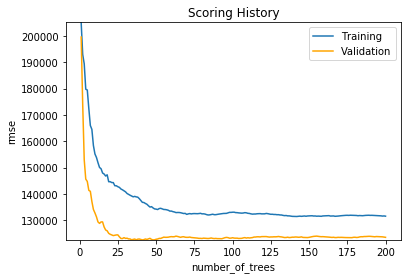

In [200]:
rFm_v2.plot()

In [201]:
print(rFm_v2.model_performance(train))
print(rFm_v2.model_performance(valid))
print(rFm_v2.model_performance(test))


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 2356588409.3537855
RMSE: 48544.70526590707
MAE: 25622.086143708322
RMSLE: 0.07028848262945203
Mean Residual Deviance: 2356588409.3537855


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 15250339710.409143
RMSE: 123492.26579186707
MAE: 68838.7852671057
RMSLE: 0.1683272818151511
Mean Residual Deviance: 15250339710.409143


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 15789815040.214285
RMSE: 125657.5307739822
MAE: 69507.44046756964
RMSLE: 0.17330599112032444
Mean Residual Deviance: 15789815040.214285



In [216]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
mGBM = H2OGradientBoostingEstimator()
mGBM.train(X,y,train,validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


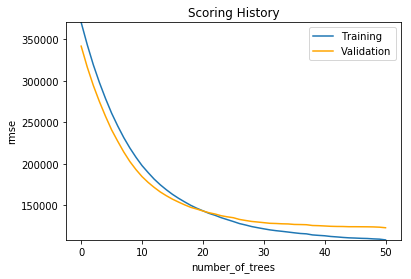

In [177]:
#Gradient Boosting machine performs alot better than Random Forest
mGBM.plot()

In [178]:
print(mGBM.model_performance(train))
print(mGBM.model_performance(valid))
print(mGBM.model_performance(test))


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 11764538756.879713
RMSE: 108464.45849622683
MAE: 68124.22117579982
RMSLE: 0.17712726988863015
Mean Residual Deviance: 11764538756.879713


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 15151069569.980753
RMSE: 123089.68100527661
MAE: 75294.78747990481
RMSLE: 0.18847763779356297
Mean Residual Deviance: 15151069569.980753


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 18535088623.86132
RMSE: 136143.63232946783
MAE: 75313.69758275172
RMSLE: 0.18434340109114292
Mean Residual Deviance: 18535088623.86132



In [207]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm = H2OGeneralizedLinearEstimator(family='poisson')
glm.train(X,y,train, validation_frame=valid)

print(glm.model_performance(train))
print(glm.model_performance(valid))
print(glm.model_performance(test))

glm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 34572092368.63454
RMSE: 185935.7210668099
MAE: 110798.57754075444
RMSLE: 0.2578752906624969
R^2: 0.7430937572916034
Mean Residual Deviance: 37418.02149365869
Null degrees of freedom: 17530
Residual degrees of freedom: 17512
Null deviance: 3153348692.0571365
Residual deviance: 655975334.8053305
AIC: 656236308.341434


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 33939346940.971836
RMSE: 184226.3470325888
MAE: 112346.4629634198
RMSLE: 0.2551967210940887
R^2: 0.7551138443053187
Mean Residual Deviance: 39230.820159096875
Null degrees of freedom: 1930
Residual degrees of freedom: 1912
Null deviance: 361940763.5526646
Residual deviance: 75754713.72721606
AIC: 75783526.16013473


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 31293622846.85472
RMSE: 176900.03631106106
MAE: 110485.29637109007
RMSLE: 0.2562600

In [205]:
from h2o.estimators import H2OXGBoostEstimator
xgb = H2OXGBoostEstimator()
xgb.train(X,y,train, validation_frame=valid)

print(xgb.model_performance(train))
print(xgb.model_performance(valid))
print(xgb.model_performance(test))

xgboost Model Build progress: |███████████████████████████████████████████| 100%

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 4354994379.705405
RMSE: 65992.38122469446
MAE: 46770.47471042368
RMSLE: 0.1340801679386717
Mean Residual Deviance: 4354994379.705405


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 13507979052.835932
RMSE: 116223.83169056135
MAE: 67448.0826436877
RMSLE: 0.19251449171731344
Mean Residual Deviance: 13507979052.835932


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 17777297419.760033
RMSE: 133331.5319785985
MAE: 70260.70232595304
RMSLE: 0.17748391819201625
Mean Residual Deviance: 17777297419.760033



In [75]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dl_1 = H2ODeepLearningEstimator(epochs=1)
dl_1.train(X, y, train, validation_frame=valid)

dl_250 = H2ODeepLearningEstimator(checkpoint=dl_1, epochs=250)
dl_250.train(X, y, train, validation_frame=valid)

dl_500 = H2ODeepLearningEstimator(checkpoint=dl_250, epochs=500)
dl_500.train(X, y, train, validation_frame=valid)

dl_750 = H2ODeepLearningEstimator(checkpoint=dl_500, epochs=750)
dl_750.train(X, y, train, validation_frame=valid)


deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1535781727465_11


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 22380027064.84029
RMSE: 149599.55569733583
MAE: 87759.92009421688
RMSLE: 0.21370312680950423
Mean Residual Deviance: 22380027064.84029

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 24848715311.597065
RMSE: 157634.75286749768
MAE: 89955.71010534812
RMSLE: 0.21468784500850321
Mean Residual Deviance: 24848715311.597065
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2018-09-01 12:33:34,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-09-01 12:33:35,1.326 sec,3158 obs/sec,0.1046431,1,1652.0,242474.9009133,58794077572.9132385,183356.6154754,0.5710341,247659.4935381,61335224739.5612640,185708.3628084,0.5630566
,2018-09-01 12:33:39,4.558 sec,4987 obs/sec,1.0957117,11,17298.0,149599.5556973,22380027064.8402901,87759.9200942,0.8367137,157634.7528675,24848715311.5970650,89955.7101053,0.8229813


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lat,1.0,1.0,0.0894646
long,0.7061282,0.7061282,0.0631734
bathrooms,0.6346927,0.6346927,0.0567825
grade,0.6333140,0.6333140,0.0566592
sqft_lot15,0.6220207,0.6220207,0.0556488
sqft_living15,0.6188028,0.6188028,0.0553609
sqft_lot,0.5978999,0.5978999,0.0534908
zipcode,0.5954517,0.5954517,0.0532718
waterfront,0.5954353,0.5954353,0.0532704
yr_renovated,0.5934330,0.5934330,0.0530912


deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1535781727465_12


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 8677167399.339277
RMSE: 93151.31453360859
MAE: 62912.54404774063
RMSLE: 0.1750716880227319
Mean Residual Deviance: 8677167399.339277

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 16785531445.37477
RMSE: 129558.98828477618
MAE: 74385.9128327004
RMSLE: 0.1921898343252441
Mean Residual Deviance: 16785531445.37477
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2018-09-01 12:33:39,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-09-01 12:33:50,11.622 sec,7003 obs/sec,4.9017546,1,77384.0,126730.5458870,16060631260.8202782,72828.6220021,0.8840263,143698.0377489,20649126052.8788185,78316.5925068,0.8528986
,2018-09-01 12:33:57,17.917 sec,9071 obs/sec,9.8069298,2,154822.0,115604.1942951,13364329738.6102638,69905.0366275,0.9034962,141556.5004663,20038242824.2691460,77276.5660745,0.8572504
,2018-09-01 12:34:02,23.340 sec,10447 obs/sec,14.7093811,3,232217.0,111378.4967190,12405169531.3761368,68813.4538271,0.9104223,142743.6173526,20375740294.8933907,77498.8169767,0.8548461
,2018-09-01 12:34:12,32.821 sec,12310 obs/sec,24.5187813,5,387078.0,110104.2416058,12122944019.5984955,65696.8340685,0.9124603,132730.8604454,17617481314.5711861,73881.3091288,0.8744956
,2018-09-01 12:34:21,42.389 sec,13312 obs/sec,34.3229873,7,541857.0,107698.8005710,11599031644.4249516,64714.7313094,0.9162435,135811.3039750,18444710287.3951607,74066.7547356,0.8686025
,2018-09-01 12:34:27,47.926 sec,13490 obs/sec,39.2280991,8,619294.0,101066.2953198,10214396049.6686020,63121.0158216,0.9262419,138066.2476776,19062288747.7798843,73277.8711165,0.8642030
,2018-09-01 12:34:36,56.759 sec,14211 obs/sec,49.0326851,10,774079.0,93151.3145336,8677167399.3392773,62912.5440477,0.9373422,129558.9882848,16785531445.3747692,74385.9128327,0.8804223
,2018-09-01 12:34:44,1 min 5.366 sec,14792 obs/sec,58.8418319,12,928936.0,92861.2826795,8623217820.8842258,62210.8834814,0.9377318,135095.3543586,18250754769.2732849,74991.2706582,0.8699842
,2018-09-01 12:34:53,1 min 13.876 sec,15255 obs/sec,68.6476215,14,1083740.0,86073.1393583,7408585318.9875250,57819.6932359,0.9465026,134668.6647157,18135649256.3041458,73081.0892432,0.8708042


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lat,1.0,1.0,0.1446397
long,0.8971945,0.8971945,0.1297700
zipcode,0.4224265,0.4224265,0.0610997
yr_built,0.4148707,0.4148707,0.0600068
sqft_lot15,0.4019054,0.4019054,0.0581315
sqft_lot,0.3916239,0.3916239,0.0566444
floors,0.3372207,0.3372207,0.0487755
condition,0.3336162,0.3336162,0.0482542
grade,0.3230917,0.3230917,0.0467319
bedrooms,0.2922600,0.2922600,0.0422724


deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1535781727465_13


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 7526429987.674215
RMSE: 86754.9997848782
MAE: 58577.772876644
RMSLE: 0.1608314646133625
Mean Residual Deviance: 7526429987.674215

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 15794046615.351555
RMSE: 125674.3673759751
MAE: 72515.14659719203
RMSLE: 0.18091523777326932
Mean Residual Deviance: 15794046615.351555
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2018-09-01 12:35:29,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-09-01 12:35:39,10.689 sec,7955 obs/sec,4.9034015,1,77410.0,126665.4233520,16044129472.9319878,75360.3072901,0.8868078,142428.4978658,20285877004.3008842,80193.6702765,0.8554863
,2018-09-01 12:35:50,21.735 sec,11321 obs/sec,14.7080509,3,232196.0,112549.9641599,12667494432.3985157,67329.0352137,0.9106301,139343.6765560,19416660196.1478691,74651.4686794,0.8616785
,2018-09-01 12:35:56,27.259 sec,12040 obs/sec,19.6098055,4,309580.0,105511.6983913,11132718497.4066010,67101.5852140,0.9214581,133489.0218156,17819318945.2883720,74772.7929640,0.8730577
,2018-09-01 12:36:02,33.416 sec,12255 obs/sec,24.5114335,5,386962.0,105294.2052465,11086869658.4958305,66091.4669977,0.9217815,137139.8101536,18807327528.9747162,74713.4066241,0.8660193
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-09-01 12:37:35,2 min 6.810 sec,15943 obs/sec,122.5762336,25,1935111.0,84428.3269295,7128142388.1227350,58505.5812603,0.9497106,136350.1456045,18591362206.3673172,76906.0518717,0.8675578
,2018-09-01 12:37:43,2 min 14.918 sec,16173 obs/sec,132.3835434,27,2089939.0,76724.6299012,5886668833.4769554,53953.2797305,0.9584692,130593.9724005,17054785627.3460312,74689.4212173,0.8785041
,2018-09-01 12:37:51,2 min 22.792 sec,16405 obs/sec,142.1918667,29,2244783.0,74223.5339573,5509132993.1138802,51541.8065195,0.9611328,127895.1204133,16357161825.5202293,72656.8952203,0.8834739
,2018-09-01 12:37:59,2 min 30.720 sec,16606 obs/sec,151.9941091,31,2399531.0,75200.2429283,5655076536.4693069,51624.5964847,0.9601031,129178.0019619,16686956190.8570518,72521.1711424,0.8811245



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lat,1.0,1.0,0.1501481
long,0.8294950,0.8294950,0.1245471
zipcode,0.4362732,0.4362732,0.0655056
yr_built,0.3985467,0.3985467,0.0598410
sqft_lot15,0.3612464,0.3612464,0.0542405
floors,0.3538744,0.3538744,0.0531336
sqft_lot,0.3370451,0.3370451,0.0506067
condition,0.3087898,0.3087898,0.0463642
bedrooms,0.3086713,0.3086713,0.0463464
grade,0.2958022,0.2958022,0.0444142


deeplearning Model Build progress: |██████████████████████████████████████| 100%


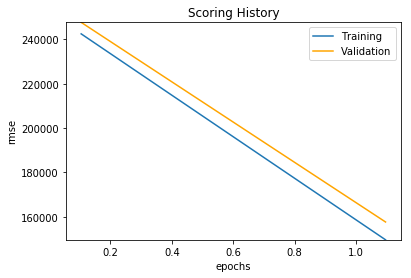

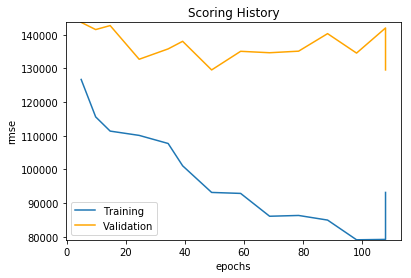

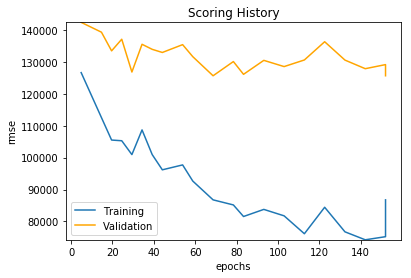

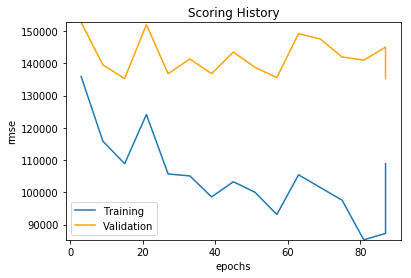

In [76]:
models_dl = [dl_1, dl_250, dl_500, dl_750]
for model in models_dl :
    model.plot()

In [83]:
models_dl = [dl_250, dl_500, dl_750]
for model in models_dl :
    print(model.model_id)
    print(model.model_performance(train))
    print(model.model_performance(valid))
    print(model.model_performance(test))

DeepLearning_model_python_1535781727465_12

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 8634098388.14165
RMSE: 92919.84926882765
MAE: 62941.52350938878
RMSLE: 0.1760315889626809
Mean Residual Deviance: 8634098388.14165


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 16785531445.37477
RMSE: 129558.98828477618
MAE: 74385.9128327004
RMSLE: 0.1921898343252441
Mean Residual Deviance: 16785531445.37477


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 15472642290.064316
RMSE: 124389.07624893881
MAE: 75273.91959544501
RMSLE: 0.19587893764110076
Mean Residual Deviance: 15472642290.064316

DeepLearning_model_python_1535781727465_13

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 7466049559.106931
RMSE: 86406.30508884713
MAE: 58345.012552096196
RMSLE: 0.16077556054696968
Mean Residual Deviance: 7466049559.106931


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 157940466

In [90]:
dl_1 = H2ODeepLearningEstimator(hidden=[1000], epochs=250)
dl_1.train(X, y, train, validation_frame=valid)

dl_2 = H2ODeepLearningEstimator(hidden=[200,200], epochs=250)
dl_2.train(X, y, train, validation_frame=valid)

dl_3 = H2ODeepLearningEstimator(hidden=[50,50,50], epochs=250)
dl_3.train(X, y, train, validation_frame=valid)

dl_4 = H2ODeepLearningEstimator(hidden=[200,200,200], epochs = 500)
dl_4.train(X, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


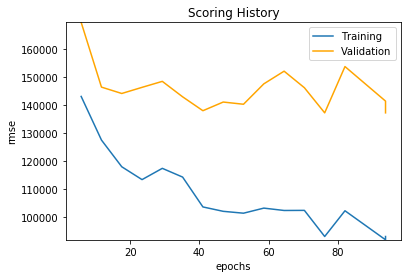

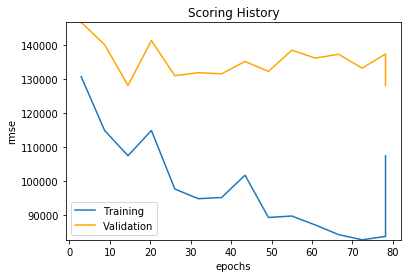

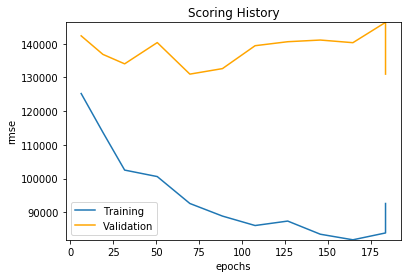

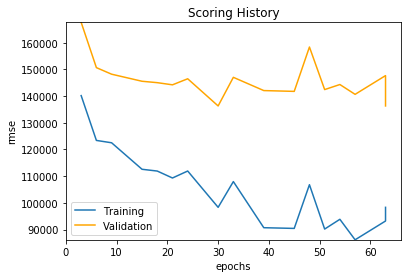

In [92]:
models_dl = [dl_1, dl_2, dl_3, dl_4]
for model in models_dl :
    model.plot()

In [91]:
models_dl = [dl_4]
for model in models_dl :
    print(model.model_id)
    print(model.model_performance(train))
    print(model.model_performance(valid))
    print(model.model_performance(test))

DeepLearning_model_python_1535781727465_24

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 9316752930.864079
RMSE: 96523.32842823064
MAE: 61198.88620648846
RMSLE: 0.1635376820447919
Mean Residual Deviance: 9316752930.864079


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 18578200641.719185
RMSE: 136301.87321427092
MAE: 72482.01226140208
RMSLE: 0.18160515454763881
Mean Residual Deviance: 18578200641.719185


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 15506457916.036549
RMSE: 124524.92889392287
MAE: 70174.45191801124
RMSLE: 0.17955585816137398
Mean Residual Deviance: 15506457916.036549



In [97]:
dl_1 = H2ODeepLearningEstimator(hidden=[200,200], epochs=250, activation='Tanh')
dl_1.train(X, y, train, validation_frame=valid)

dl_2 = H2ODeepLearningEstimator(hidden=[200,200], epochs=500, activation='Tanh')
dl_2.train(X, y, train, validation_frame=valid)

dl_3 = H2ODeepLearningEstimator(hidden=[200,200,200], epochs=250, activation='Tanh')
dl_3.train(X, y, train, validation_frame=valid)

dl_4 = H2ODeepLearningEstimator(hidden=[200,200,200], epochs = 500, activation='Tanh')
dl_4.train(X, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


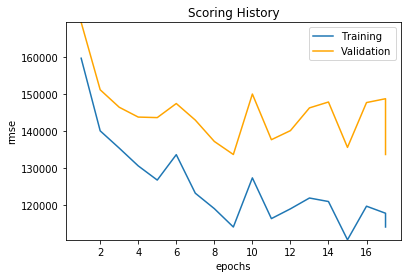

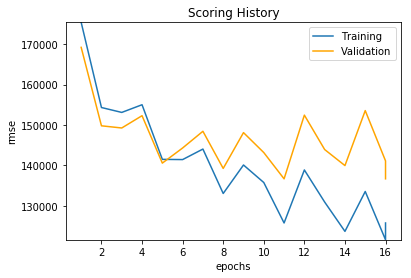

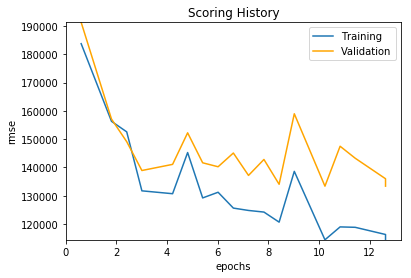

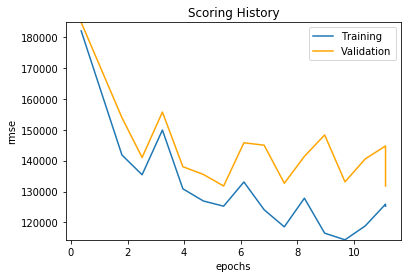

In [98]:
models_dl = [dl_1, dl_2, dl_3, dl_4]
for model in models_dl :
    model.plot()

In [99]:
models_dl = [dl_1, dl_2, dl_3, dl_4]
for model in models_dl :
    print(model.model_id)
    print(model.model_performance(train))
    print(model.model_performance(test))

DeepLearning_model_python_1535781727465_29

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 14320172802.207327
RMSE: 119666.92442862951
MAE: 70288.91979327053
RMSLE: NaN
Mean Residual Deviance: 14320172802.207327


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 16424410840.345514
RMSE: 128157.75762842261
MAE: 76491.35052235177
RMSLE: 0.19050931740668808
Mean Residual Deviance: 16424410840.345514

DeepLearning_model_python_1535781727465_30

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 14336221439.537432
RMSE: 119733.9610951606
MAE: 73926.24906578603
RMSLE: 0.19065066474963963
Mean Residual Deviance: 14336221439.537432


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 17365752043.524185
RMSE: 131779.17909717068
MAE: 79790.29383110092
RMSLE: 0.2018204626164245
Mean Residual Deviance: 17365752043.524185

DeepLearning_model_python_1535781727465_31

ModelMetricsRegression: deeplearning
** Repo

In [148]:
DL_final_model = H2ODeepLearningEstimator(hidden=[200,200,200], epochs = 500, activation='Tanh')
DL_final_model.train(X, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [150]:
print(DL_final_model.model_performance(train))
print(DL_final_model.model_performance(valid))
print(DL_final_model.model_performance(test))


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 12411787671.445536
RMSE: 111408.20289119439
MAE: 64885.6489616708
RMSLE: 0.17015526989207516
Mean Residual Deviance: 12411787671.445536


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 9765328987.632132
RMSE: 98819.67915163524
MAE: 66365.80135001062
RMSLE: 0.17804797480664575
Mean Residual Deviance: 9765328987.632132


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 14516999254.432251
RMSE: 120486.51067415079
MAE: 71786.0409880403
RMSLE: 0.18228785182163265
Mean Residual Deviance: 14516999254.432251



In [226]:
from h2o.automl import H2OAutoML
mA = H2OAutoML(max_runtime_secs=300)
mA.train(X,y,train, validation_frame=valid)
mA

AutoML progress: |█████

H2OConnectionError: Unexpected HTTP error: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [ ]:
lb = mA.leaderboard
lb

In [ ]:
mA.leader.model_performance(test)

In [45]:
folds = 5

from h2o.estimators.random_forest import H2ORandomForestEstimator
rFm = H2ORandomForestEstimator(nfolds=folds,fold_assignment="Modulo",keep_cross_validation_predictions=True)
rFm.train(X,y,train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
mGBM = H2OGradientBoostingEstimator(nfolds=folds,fold_assignment="Modulo",keep_cross_validation_predictions=True)
mGBM.train(X,y,train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
print(rFm.model_performance(test))
print(mGBM.model_performance(test))


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 17146899670.74404
RMSE: 130946.17088996546
MAE: 71334.87365890863
RMSLE: 0.17529087193633192
Mean Residual Deviance: 17146899670.74404


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 17758606076.3635
RMSE: 133261.42005983388
MAE: 74672.27640042323
RMSLE: 0.1827724984746167
Mean Residual Deviance: 17758606076.3635



In [48]:
from h2o.estimators import H2OXGBoostEstimator
xgb = H2OXGBoostEstimator(nfolds=folds,fold_assignment="Modulo",keep_cross_validation_predictions=True)
xgb.train(X,y,train)

print(xgb.summary())
#print(xgb.model_performance(valid))
print(xgb.model_performance(test))

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Summary: 


,number_of_trees
,50.0




ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 15763190935.46738
RMSE: 125551.54692582398
MAE: 68817.24023709902
RMSLE: 0.17436905701953903
Mean Residual Deviance: 15763190935.46738



In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
DL_final_model = H2ODeepLearningEstimator(hidden=[200,200,200], epochs=500, activation='Tanh')
DL_final_model.train(X, y, train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [10]:
print(DL_final_model.model_performance(test))


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 15998637002.784037
RMSE: 126485.71857243028
MAE: 77832.73312783483
RMSLE: 0.21065310523363875
Mean Residual Deviance: 15998637002.784037



In [52]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

# Train a stacked ensemble using above models
ensemble = H2OStackedEnsembleEstimator(base_models=[rFm,mGBM, xgb,DL_final_model])
ensemble.train(X,y,train)

# Eval ensemble performance on the test data
ensemble.model_performance(test)

stackedensemble Model Build progress: |███████████████████████████████████| 100%

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 130173619551.0964
RMSE: 360795.8142095005
MAE: 235754.8211477255
RMSLE: 0.5498254902812145
R^2: 0.020736144416238944
Mean Residual Deviance: 130173619551.0964
Null degrees of freedom: 2150
Residual degrees of freedom: 2146
Null deviance: 285935013037402.9
Residual deviance: 280003455654408.38
AIC: 61164.955807237995


In [41]:
perf_stack_test


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 130207270673.55692
RMSE: 360842.4457759327
MAE: 235795.79279187357
RMSLE: 0.5499231022480452
R^2: 0.020482995367767765
Mean Residual Deviance: 130207270673.55692
Null degrees of freedom: 2150
Residual degrees of freedom: 2146
Null deviance: 285935013037402.9
Residual deviance: 280075839218820.94
AIC: 61165.51178939746
